In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt

import sys
from Bio import motifs
from Bio.Seq import Seq

from scipy.stats import pearsonr, spearmanr

In [4]:
snps = pd.read_csv('../../hyprcoloc_results_old/ForColoc/snpscores.txt.gz', sep='\t')
hyprcoloc = pd.read_csv('../../hyprcoloc_results_old/ForColoc/hyprcoloc.results.txt.gz', sep='\t')
colocalized = pd.read_csv('../../hyprcoloc_results_old/ForColoc/hyprcoloc.results.OnlyColocalized.Stats.txt.gz', sep='\t')



In [2]:
def get_intron_SJ(intron):
    intron_ = intron.split(';')[1]
    chrom, start, end, cluster = intron_.split(':')
    strand = cluster.split('_')[-1]
    
    if strand == '+':
        ss5 = (int(start)-2, int(start)+6)
        ss3 = (int(end)-7, int(end)+1)
        
    else:
        ss5 = (int(end)-7, int(end)+1)
        ss3 = (int(start)-2, int(start)+6)
        
    return chrom, strand, ss5, ss3


def get_SJ_bed(intron_list, phenotype):
    
    fh_5ss = open('../../' + phenotype + '.hyprcoloc_5ss.bed', 'w')
    fh_3ss = open('../../' + phenotype + '.hyprcoloc_3ss.bed', 'w')
    
    for intron in intron_list:
        
        chrom, strand, ss5, ss3 = get_intron_SJ(intron)
        
        ss5_row = '\t'.join(['chr' + chrom, str(ss5[0]), str(ss5[1]), intron, '.', strand]) + '\n'
        ss3_row = '\t'.join(['chr' + chrom, str(ss3[0]), str(ss3[1]), intron, '.', strand]) + '\n'
        
        fh_5ss.write(ss5_row)
        fh_3ss.write(ss3_row)
    
        
def get_intron_SJ_extended(intron):
    intron_ = intron.split(';')[1]
    chrom, start, end, cluster = intron_.split(':')
    strand = cluster.split('_')[-1]
    
    if strand == '+':
        ss5 = (int(start)-22, int(start)+26)
        ss3 = (int(end)-27, int(end)+21)
        
    else:
        ss5 = (int(end)-27, int(end)+21)
        ss3 = (int(start)-22, int(start)+26)
        
    return chrom, strand, ss5, ss3


def get_SJ_bed_extended(intron_list, phenotype):
    
    fh_5ss = open('../../' + phenotype + '.hyprcoloc_5ss.extended.bed', 'w')
    fh_3ss = open('../../' + phenotype + '.hyprcoloc_3ss.extended.bed', 'w')
    
    for intron in intron_list:
        
        chrom, strand, ss5, ss3 = get_intron_SJ_extended(intron)
        
        ss5_row = '\t'.join(['chr' + chrom, str(ss5[0]), str(ss5[1]), intron, '.', strand]) + '\n'
        ss3_row = '\t'.join(['chr' + chrom, str(ss3[0]), str(ss3[1]), intron, '.', strand]) + '\n'
        
        fh_5ss.write(ss5_row)
        fh_3ss.write(ss3_row)
    
        
    

In [ ]:
splicing_coloc_idx = colocalized.loc[
    [y == 'polyA.Splicing.Subset_YRI' for y in [x.split(';')[0] for x in colocalized.phenotype_full]]
].index

In [53]:
colocaliz

Int64Index([], dtype='int64')

In [56]:
splicing_coloc_idx = colocalized.loc[
    [y == 'polyA.Splicing.Subset_YRI' for y in [x.split(';')[0] for x in colocalized.phenotype_full]]
].index

get_SJ_bed(list(colocalized.loc[splicing_coloc_idx].phenotype_full.unique()), 'polyA.Splicing')
get_SJ_bed_extended(list(colocalized.loc[splicing_coloc_idx].phenotype_full.unique()), 'polyA.Splicing')

splicing_coloc_idx = colocalized.loc[
    [y == 'chRNA.Splicing' for y in [x.split(';')[0] for x in colocalized.phenotype_full]]
].index

get_SJ_bed(list(colocalized.loc[splicing_coloc_idx].phenotype_full.unique()), 'chRNA.Splicing')
get_SJ_bed_extended(list(colocalized.loc[splicing_coloc_idx].phenotype_full.unique()), 'chRNA.Splicing')

bedtools sort -i polyA.Splicing.hyprcoloc_5ss.bed | bedtools getfasta -s -tab -name+ -fi ChromatinSplicingQTLs/code/ReferenceGenome/Fasta/GRCh38.primary_assembly.genome.fa -bed - > polyA.Splicing.hyprcoloc_5ss.sorted.tab

bedtools sort -i polyA.Splicing.hyprcoloc_5ss.extended.bed | bedtools getfasta -s -tab -name+ -fi ChromatinSplicingQTLs/code/ReferenceGenome/Fasta/GRCh38.primary_assembly.genome.fa -bed - > polyA.Splicing.hyprcoloc_5ss.extended.sorted.tab

bedtools sort -i polyA.Splicing.hyprcoloc_3ss.bed | bedtools getfasta -s -tab -name+ -fi ChromatinSplicingQTLs/code/ReferenceGenome/Fasta/GRCh38.primary_assembly.genome.fa -bed - > polyA.Splicing.hyprcoloc_3ss.sorted.tab

bedtools sort -i polyA.Splicing.hyprcoloc_3ss.extended.bed | bedtools getfasta -s -tab -name+ -fi ChromatinSplicingQTLs/code/ReferenceGenome/Fasta/GRCh38.primary_assembly.genome.fa -bed - > polyA.Splicing.hyprcoloc_3ss.extended.sorted.tab


bedtools sort -i chRNA.Splicing.hyprcoloc_5ss.bed | bedtools getfasta -s -tab -name+ -fi ChromatinSplicingQTLs/code/ReferenceGenome/Fasta/GRCh38.primary_assembly.genome.fa -bed - > chRNA.Splicing.hyprcoloc_5ss.sorted.tab

bedtools sort -i chRNA.Splicing.hyprcoloc_5ss.extended.bed | bedtools getfasta -s -tab -name+ -fi ChromatinSplicingQTLs/code/ReferenceGenome/Fasta/GRCh38.primary_assembly.genome.fa -bed - > chRNA.Splicing.hyprcoloc_5ss.extended.sorted.tab

bedtools sort -i chRNA.Splicing.hyprcoloc_3ss.bed | bedtools getfasta -s -tab -name+ -fi ChromatinSplicingQTLs/code/ReferenceGenome/Fasta/GRCh38.primary_assembly.genome.fa -bed - > chRNA.Splicing.hyprcoloc_3ss.sorted.tab

bedtools sort -i chRNA.Splicing.hyprcoloc_3ss.extended.bed | bedtools getfasta -s -tab -name+ -fi ChromatinSplicingQTLs/code/ReferenceGenome/Fasta/GRCh38.primary_assembly.genome.fa -bed - > chRNA.Splicing.hyprcoloc_3ss.extended.sorted.tab

In [39]:
splicing_coloc_idx

Int64Index([   11,    12,    13,    14,    15,    16,    41,    42,    78,
               79,
            ...
            25754, 25764, 25765, 25776, 25777, 25778, 25779, 25780, 25784,
            25785],
           dtype='int64', length=2712)

In [5]:
df = pd.read_csv('../../chRNA.Splicing.hyprcoloc_5ss.sorted.tab', sep='\t', names=['name', 'seq'])

df['seq'] = df['seq'].apply(Seq)

m  = motifs.create(df['seq'])
pwm = m.counts.normalize()
pssm = pwm.log_odds()

df['score'] = df['seq'].apply(pssm.calculate)


df_extended = pd.read_csv('../../chRNA.Splicing.hyprcoloc_5ss.extended.sorted.tab', sep='\t', names=['name', 'seq'])
df_extended['seq'] = df_extended['seq'].apply(Seq)

me  = motifs.create(df_extended['seq'])
pwme = me.counts.normalize()
pssme = pwme.log_odds()

# pssm.calculate(m.consensus)
df_extended['score'] = df_extended['seq'].apply(pssme.calculate)

df.index = [df.name[i].split('::')[0] for i in range(len(df.name))]
df_extended.index = [df_extended.name[i].split('::')[0] for i in range(len(df_extended.name))]

merged_snps = colocalized.merge(snps, left_on='Locus', right_on='Locus')

splicing_idx = merged_snps.loc[
    [y == 'chRNA.Splicing' for y in [x.split(';')[0] for x in merged_snps.phenotype_full]]
].index

In [20]:
def mutate(seq, extended_seq, pos, snp, strand):
    
    chrom, position, original, new = snp.split(':')
    
    if strand == '-':
        seq = get_neg_nucleotide(seq)
        extended_seq = get_neg_nucleotide(extended_seq)
    
    if (len(original) == 1) and (len(new)==1):
        
        assert seq[pos] == original

        nuc = list(seq)
        nuc[pos] = new

        mutated_seq = ''.join(nuc)

        if strand == '-':
            mutated_seq = get_neg_nucleotide(mutated_seq)

        return mutated_seq
    
    else:
        
        if strand == '+':

            assert extended_seq[(pos+20):(pos+len(original)+20)] == original
            
            seq5 = extended_seq[:(pos+20)]
            seq3 = extended_seq[(pos+len(original)+20):]

            mutated_seq = seq5 + new + seq3
            mutated_seq = mutated_seq[20:28]
            
        else:
            
            assert extended_seq[(pos+21-len(original)):(pos+21)][::-1] == original
            
            seq5 = extended_seq[:(pos+21)][::-1]
            seq3 = extended_seq[(pos+21-len(original)):][::-1]
            
            mutated_seq = seq5 + new + seq3
            mutated_seq = get_neg_nucleotide(mutated_seq)[::-1][20:28]
        
        return mutated_seq
        
        
    
def get_neg_nucleotide(S):
    new_S = ''
    for i in range(len(S)):
        N = S[i]
        if N == 'A':
            new_S += 'T'
        elif N == 'T':
            new_S += 'A'
        elif N == 'G':
            new_S += 'C'
        elif N == 'C':
            new_S += 'G'
    return new_S#[::-1]
        

def get_splice_junctions(intron):
    chrom, start, end, clu = intron.split(';')[1].split(':')
    strand = clu.split('_')[-1]
    
    return int(start), int(end), strand


def isSNPin5SS(snp, intron, mut_diff):
    
    snp_pos = int(snp.split(':')[1])
    
    start, end, strand = get_splice_junctions(intron)
    
    seq = str(df.loc[intron].seq)
    extended_seq = str(df_extended.loc[intron].seq)
    
    for i in range(8):
        if strand == '+':
            test_pos = start + i - 1
        else:
            test_pos = end - i + 1
        
        if snp_pos == test_pos:
            mutated_seq = mutate(seq, extended_seq, i, snp, strand)
            mut_diff.append(np.max([pssm.calculate(Seq(mutated_seq)), -10]) - pssm.calculate(Seq(seq)))
            
            return mut_diff
    return mut_diff


def isClusterinSJ(data, snp_x, mut_diff, beta):
    snp_x_data = data.loc[data.snp_x == snp_x]
    
    token = False
    
    snps_sj_pr = []
    snps_no_sj_pr = []
    betas = []
    p = []
    
    df_list = []
    
    for idx in snp_x_data.index:
        
        l = len(mut_diff)
        
        intron = snp_x_data.loc[idx, 'phenotype_full']
        snp_y = snp_x_data.loc[idx, 'snp_y']
        locus = snp_x_data.loc[idx, 'Locus']
        
        mut_diff = isSNPin5SS(snp_y, intron, mut_diff)
        
        
        
        if l < len(mut_diff):
            beta.append(snp_x_data.loc[idx, 'beta'])
            
            df_list.append([snp_y, intron, mut_diff[-1], snp_x_data.loc[idx, 'beta']])
            
            print(snp_y)
            print(intron)
            print(mut_diff[-1])
            print(snp_x_data.loc[idx, 'beta'])
            print('')
            
            
            
    return mut_diff, beta, df_list
        
        

merged_splicing = merged_snps.loc[splicing_idx]

mut_diff = []
beta = []
sig_snp = []

df_out = []

for snp_x in tqdm(merged_splicing.snp_x.unique(), leave=True, position=0):
    l = len(mut_diff)
    mut_diff, beta, df_list = isClusterinSJ(merged_splicing, snp_x, mut_diff, beta)
    if len(mut_diff) > l:
        sig_snp.append(snp_x)
        df_out.extend(df_list)

  1%|          | 14/1150 [00:00<00:18, 59.80it/s]

19:41585872:G:A
chRNA.Splicing;19:41585871:41586464:clu_45477_+
-11.352595388889313
-1.01411

19:41585872:G:A
chRNA.Splicing;19:41585871:41586154:clu_45477_+
-11.352595388889313
1.1343

17:51166498:G:A
chRNA.Splicing;17:51166497:51166827:clu_41841_+
-11.352595090866089
-1.69604

17:51166498:G:A
chRNA.Splicing;17:51166497:51166827:clu_41841_+
-11.352595090866089
-1.69604



  6%|▋         | 72/1150 [00:01<00:17, 62.41it/s]

4:13578908:A:G
chRNA.Splicing;4:13577631:13578912:clu_12688_-
-0.4296841621398926
1.38841

5:113559932:T:C
chRNA.Splicing;5:113559930:113561080:clu_14141_+
-7.343185901641846
-0.467784



  7%|▋         | 80/1150 [00:01<00:16, 65.19it/s]

10:100986746:C:T
chRNA.Splicing;10:100984074:100986749:clu_26545_-
0.506690502166748
0.622264

10:100986746:C:T
chRNA.Splicing;10:100983817:100986749:clu_26545_-
0.506690502166748
1.06575

16:2924954:G:A
chRNA.Splicing;16:2924955:2929613:clu_38141_+
2.445356607437134
2.09572

16:2924954:G:A
chRNA.Splicing;16:2924955:2928824:clu_38141_+
2.445356607437134
2.12357



 10%|█         | 116/1150 [00:01<00:13, 76.76it/s]

5:150486024:G:C
chRNA.Splicing;5:150486023:150520868:clu_14435_+
-20.748722076416016
-1.17196

16:1772796:C:CACCT
chRNA.Splicing;16:1772646:1772799:clu_36877_-
-13.830820560455322
-0.697932

16:1772796:C:CACCT
chRNA.Splicing;16:1772646:1772795:clu_36877_-
-6.81601881980896
1.07521



 12%|█▏        | 133/1150 [00:02<00:14, 71.27it/s]

19:7623728:T:C
chRNA.Splicing;19:7623289:7623731:clu_43398_-
-0.506690502166748
-0.722072

1:1231507:T:C
chRNA.Splicing;1:1228946:1231507:clu_53_-
3.184239387512207
0.894126



 13%|█▎        | 150/1150 [00:02<00:14, 71.04it/s]

5:69368820:T:C
chRNA.Splicing;5:69366595:69368825:clu_15003_-
2.8544366359710693
0.963961

5:69368820:T:C
chRNA.Splicing;5:69366595:69368825:clu_15003_-
2.8544366359710693
0.963961

4:2798927:G:A
chRNA.Splicing;4:2798928:2820614:clu_11648_+
2.4453558921813965
0.847507

20:56388683:T:G
chRNA.Splicing;20:56388202:56388687:clu_46475_-
-2.7620668411254883
-1.08254



 15%|█▌        | 174/1150 [00:02<00:15, 64.75it/s]

22:45171154:C:T
chRNA.Splicing;22:45171152:45171600:clu_48485_+
7.343185663223267
1.27196

22:50424341:T:C
chRNA.Splicing;22:50424337:50424509:clu_48595_+
-0.4296846389770508
-0.814647

22:50424341:T:C
chRNA.Splicing;22:50424337:50424376:clu_48595_+
-0.4296846389770508
0.900123

22:50424341:T:C
chRNA.Splicing;22:50424337:50424471:clu_48595_+
-0.4296846389770508
-0.663108



 16%|█▌        | 183/1150 [00:02<00:14, 68.25it/s]

14:24441004:C:A
chRNA.Splicing;14:24440926:24441009:clu_34292_-
-2.887226104736328
-1.43027

14:24441670:G:A
chRNA.Splicing;14:24440926:24441674:clu_34292_-
0.4296836853027344
0.661651

14:24441767:T:G
chRNA.Splicing;14:24440926:24441771:clu_34292_-
-2.7620668411254883
-0.657226

14:24441768:T:A
chRNA.Splicing;14:24440926:24441771:clu_34292_-
-3.87446928024292
-0.657226

14:24441767:T:G
chRNA.Splicing;14:24441138:24441771:clu_34292_-
-2.7620668411254883
-0.643084

14:24441768:T:A
chRNA.Splicing;14:24441138:24441771:clu_34292_-
-3.87446928024292
-0.643084

14:24441670:G:A
chRNA.Splicing;14:24441138:24441674:clu_34292_-
0.4296836853027344
0.671081



 18%|█▊        | 206/1150 [00:03<00:20, 46.57it/s]

14:96379755:G:A
chRNA.Splicing;14:96379755:96382247:clu_33974_+
-3.184239625930786
-1.42227

20:62956963:G:T
chRNA.Splicing;20:62956962:62957441:clu_47169_+
-15.724429607391357
-3.19864

20:62956964:T:C
chRNA.Splicing;20:62956962:62957441:clu_47169_+
-7.343185782432556
-3.19864



 19%|█▉        | 223/1150 [00:03<00:15, 57.94it/s]

16:536144:T:C
chRNA.Splicing;16:536142:537134:clu_37958_+
-7.3431854248046875
-0.889825

16:536144:T:C
chRNA.Splicing;16:536142:546817:clu_37958_+
-7.3431854248046875
-0.635366

16:14878837:A:G
chRNA.Splicing;16:14878834:14880015:clu_38292_+
-0.5066900253295898
-1.51134

8:98193384:C:T
chRNA.Splicing;8:98193090:98193385:clu_21407_-
-11.35259498655796
-0.639738



 22%|██▏       | 251/1150 [00:04<00:11, 76.77it/s]

19:57492212:G:A
chRNA.Splicing;19:57492211:57492856:clu_45947_+
-11.352595329284668
1.08176



 23%|██▎       | 260/1150 [00:04<00:12, 69.39it/s]

7:43656029:C:T
chRNA.Splicing;7:43648652:43656033:clu_18759_-
2.132650852203369
2.52457

7:43656029:C:T
chRNA.Splicing;7:43650712:43656033:clu_18759_-
2.132650852203369
2.54445

9:127872148:T:C
chRNA.Splicing;9:127871939:127872153:clu_23480_-
2.8544366359710693
2.3431

9:127872148:T:C
chRNA.Splicing;9:127871939:127872153:clu_23480_-
2.8544366359710693
2.3431



 27%|██▋       | 316/1150 [00:05<00:16, 49.68it/s]

2:177332141:C:T
chRNA.Splicing;2:177323396:177332142:clu_6311_-
-11.35259485244751
-1.14958

1:117060566:G:T
chRNA.Splicing;1:117060561:117062387:clu_3837_+
-2.8872264623641968
-0.990619



 28%|██▊       | 322/1150 [00:05<00:32, 25.13it/s]

1:99975068:A:G
chRNA.Splicing;1:99975069:99993537:clu_3649_+
-2.4453563690185547
-1.15249

1:99975068:A:G
chRNA.Splicing;1:99975069:99993537:clu_3649_+
-2.4453563690185547
-1.15249



 29%|██▉       | 333/1150 [00:06<00:31, 26.12it/s]

18:63392121:G:A
chRNA.Splicing;18:63391076:63392120:clu_43050_-
0.3437952995300293
-1.0218

14:74297633:G:A
chRNA.Splicing;14:74296449:74297639:clu_34647_-
1.5636937618255615
1.37928

14:74297633:G:A
chRNA.Splicing;14:74296449:74297639:clu_34647_-
1.5636937618255615
1.37928

14:74297633:G:A
chRNA.Splicing;14:74296449:74297639:clu_34647_-
1.5636937618255615
1.37928



 30%|███       | 346/1150 [00:06<00:33, 24.22it/s]

14:73922205:T:C
chRNA.Splicing;14:73922206:73923395:clu_33802_+
-0.3437952995300293
0.849299



 31%|███       | 356/1150 [00:07<00:28, 27.70it/s]

13:19675459:C:CACTT
chRNA.Splicing;13:19674984:19675462:clu_32350_-
-8.563755869865417
2.16613



 33%|███▎      | 375/1150 [00:07<00:17, 45.36it/s]

5:65788274:A:G
chRNA.Splicing;5:65788274:65792454:clu_13783_+
3.1842395067214966
0.931841

12:57476865:A:G
chRNA.Splicing;12:57476651:57476871:clu_30193_-
-1.5636940002441406
-1.1317

4:8236431:A:G
chRNA.Splicing;4:8236428:8237474:clu_11722_+
-0.5066900253295898
-1.57465



 35%|███▌      | 408/1150 [00:08<00:11, 66.79it/s]

19:49665670:A:C
chRNA.Splicing;19:49664846:49665672:clu_44253_-
-11.343185901641846
-0.980185

17:42288996:G:A
chRNA.Splicing;17:42288997:42289402:clu_41587_+
2.445356607437134
1.73622

7:91970511:A:C
chRNA.Splicing;7:91970508:91973711:clu_20304_+
-3.5405678749084473
-1.0514



 37%|███▋      | 423/1150 [00:08<00:10, 66.21it/s]

15:40564790:C:T
chRNA.Splicing;15:40563027:40564791:clu_35123_-
-11.352595567703247
1.50217

14:20345130:G:A
chRNA.Splicing;14:20345126:20345394:clu_33295_+
2.132650852203369
1.89399

14:20413368:T:C
chRNA.Splicing;14:20408463:20413371:clu_34150_-
-0.5066909790039062
-1.39421



 38%|███▊      | 439/1150 [00:08<00:09, 71.41it/s]

1:40041496:A:G
chRNA.Splicing;1:40041493:40059337:clu_3153_+
-0.5066900253295898
-1.25793



 39%|███▉      | 454/1150 [00:08<00:11, 58.29it/s]

14:91170188:C:T
chRNA.Splicing;14:91170186:91173289:clu_33911_+
7.343185782432556
2.03122

18:36781799:G:C
chRNA.Splicing;18:36780188:36781799:clu_42940_-
5.010210037231445
1.48678



 41%|████      | 474/1150 [00:09<00:13, 49.12it/s]

1:183128821:G:GTTA
chRNA.Splicing;1:183128820:183130344:clu_4488_+
-2.887226104736328
-0.747835

13:52143914:CT:C
chRNA.Splicing;13:52136902:52143916:clu_32611_-
11.860204696655273
-1.12232

13:52143914:CT:C
chRNA.Splicing;13:52141069:52143915:clu_32611_-
-17.407576084136963
1.15183



 43%|████▎     | 490/1150 [00:09<00:12, 53.18it/s]

11:73136417:G:A
chRNA.Splicing;11:73134657:73136423:clu_27598_-
1.5636935234069824
1.04858

11:73136417:G:A
chRNA.Splicing;11:73083740:73136423:clu_27598_-
1.5636935234069824
1.46924

1:78628396:T:A
chRNA.Splicing;1:78628393:78628951:clu_3539_+
3.8744688034057617
1.42619



 44%|████▎     | 503/1150 [00:09<00:13, 48.75it/s]

12:11829229:A:G
chRNA.Splicing;12:11829229:11839140:clu_31139_+
3.1842397451400757
0.963119



 45%|████▌     | 521/1150 [00:10<00:10, 59.02it/s]

15:100570360:C:T
chRNA.Splicing;15:100570117:100570361:clu_35906_-
-11.352595329284668
-1.16724

15:74837752:T:C
chRNA.Splicing;15:74837435:74837757:clu_35661_-
2.8544363975524902
1.66075

15:74837752:T:C
chRNA.Splicing;15:74837435:74837751:clu_35661_-
-2.4453563690185547
-2.30696

17:2372791:G:T
chRNA.Splicing;17:2372786:2372953:clu_40936_+
-2.8872265219688416
-0.733573

17:82458516:G:A
chRNA.Splicing;17:82458517:82459992:clu_42310_+
2.4453563690185547
0.672564

17:82458523:C:G
chRNA.Splicing;17:82458517:82459992:clu_42310_+
0.35394287109375
0.672564

11:293001:A:AG
chRNA.Splicing;11:292997:293163:clu_28063_+
0.0
-0.876713



 49%|████▉     | 562/1150 [00:10<00:08, 67.72it/s]

3:11844891:T:C
chRNA.Splicing;3:11844211:11844891:clu_8691_-
3.184239387512207
1.48577



 52%|█████▏    | 595/1150 [00:11<00:06, 86.50it/s]

10:93701718:C:T
chRNA.Splicing;10:93700106:93701719:clu_26416_-
-11.352595329284668
-0.838556

11:113364697:A:G
chRNA.Splicing;11:113364694:113364835:clu_29210_+
-0.506690502166748
-0.818922

2:9543693:T:C
chRNA.Splicing;2:9543285:9543696:clu_5086_-
-0.506690502166748
-0.562082



 54%|█████▎    | 618/1150 [00:11<00:10, 51.32it/s]

18:45953254:C:A
chRNA.Splicing;18:45952643:45953255:clu_42954_-
-20.591815948486328
-0.984233

5:96740783:G:A
chRNA.Splicing;5:96740783:96741266:clu_14044_+
-3.1842398643493652
-1.69836



 55%|█████▌    | 635/1150 [00:11<00:08, 62.23it/s]

7:55517653:C:T
chRNA.Splicing;7:55497690:55517658:clu_18837_-
-2.8544363975524902
0.817402

8:123142457:G:T
chRNA.Splicing;8:123142456:123144717:clu_22513_+
-17.73737907409668
-0.859449



 57%|█████▋    | 658/1150 [00:12<00:10, 46.60it/s]

1:205627742:T:C
chRNA.Splicing;1:205623891:205627742:clu_2103_-
3.184239387512207
1.42724



 61%|██████    | 700/1150 [00:13<00:07, 59.25it/s]

1:74733530:G:A
chRNA.Splicing;1:74733531:74736542:clu_3515_+
2.4453561305999756
1.54848

1:228107668:C:T
chRNA.Splicing;1:228106918:228107668:clu_2284_-
-3.184239387512207
-1.98368

2:108786919:A:C
chRNA.Splicing;2:108786915:108788032:clu_7589_+
-2.7620668411254883
-1.74327



 62%|██████▏   | 714/1150 [00:13<00:08, 50.31it/s]

3:69009632:C:T
chRNA.Splicing;3:69008528:69009637:clu_9310_-
-2.8544363975524902
-0.946535



 63%|██████▎   | 726/1150 [00:13<00:08, 49.96it/s]

3:45985149:G:T
chRNA.Splicing;3:45985022:45985152:clu_8924_-
3.5405683517456055
1.80031

4:1347503:A:G
chRNA.Splicing;4:1347503:1348090:clu_11620_+
3.184239625930786
1.18722



 64%|██████▍   | 739/1150 [00:14<00:09, 42.70it/s]

5:158790031:T:C
chRNA.Splicing;5:158777539:158790035:clu_15556_-
-2.132650852203369
-0.680418

5:74772422:G:GT
chRNA.Splicing;5:74772421:74773868:clu_13883_+
-9.564616680145264
-0.721236

7:128477173:G:A
chRNA.Splicing;7:128477173:128479158:clu_20634_+
-3.184239625930786
-2.15525



 68%|██████▊   | 784/1150 [00:14<00:05, 67.54it/s]

17:29568510:T:C
chRNA.Splicing;17:29568508:29569018:clu_41346_+
-7.343185603618622
-1.10368

19:52414373:A:G
chRNA.Splicing;19:52414368:52414939:clu_45810_+
2.8544363975524902
0.51691

17:5111073:T:A
chRNA.Splicing;17:5109868:5111076:clu_39434_-
-3.8744691908359528
-1.22627

17:78133555:T:C
chRNA.Splicing;17:78133553:78133853:clu_42178_+
-7.343185663223267
-0.973645

1:39026408:G:T
chRNA.Splicing;1:39026402:39028723:clu_3130_+
1.2097501754760742
1.53076



 70%|██████▉   | 800/1150 [00:15<00:05, 60.07it/s]

11:28122185:A:G
chRNA.Splicing;11:28122180:28211062:clu_28348_+
2.8544368743896484
0.757786

11:28122185:A:G
chRNA.Splicing;11:28122180:28123862:clu_28348_+
2.8544368743896484
0.681685

5:131165058:A:C
chRNA.Splicing;5:131162676:131165060:clu_15297_-
-11.343185663223267
-0.886082

2:48346756:G:C
chRNA.Splicing;2:48346751:48359047:clu_7152_+
-3.620512008666992
-1.45781

19:54200892:A:C
chRNA.Splicing;19:54200888:54201160:clu_45853_+
-2.76206636428833
0.803529

19:54200892:A:C
chRNA.Splicing;19:54200893:54201160:clu_45853_+
-2.6135315895080566
-0.754894



 71%|███████▏  | 822/1150 [00:15<00:04, 70.15it/s]

15:45401939:C:G
chRNA.Splicing;15:45399595:45401939:clu_35285_-
-5.010210037231445
-0.987429

10:45672399:C:T
chRNA.Splicing;10:45663842:45672398:clu_26083_-
2.4453563690185547
1.59893

19:21360602:C:T
chRNA.Splicing;19:21360596:21361766:clu_45148_+
1.5636935234069824
0.849753



 73%|███████▎  | 840/1150 [00:15<00:04, 63.83it/s]

3:122721654:G:A
chRNA.Splicing;3:122721653:122727812:clu_11028_+
-11.352595329284668
-0.778955

1:241849237:T:G
chRNA.Splicing;1:241849237:241850409:clu_4966_+
3.492361843585968
1.52247



 74%|███████▍  | 856/1150 [00:16<00:04, 68.35it/s]

11:66003074:G:A
chRNA.Splicing;11:66003070:66003235:clu_28774_+
2.13265061378479
0.967272

5:94941849:A:T
chRNA.Splicing;5:94940195:94941852:clu_15163_-
3.8744688034057617
0.930968

17:82188213:G:A
chRNA.Splicing;17:82183932:82188219:clu_40863_-
1.5636940002441406
1.61507



 76%|███████▌  | 870/1150 [00:18<00:17, 15.70it/s]

14:100397259:A:G
chRNA.Splicing;14:100397259:100468021:clu_33996_+
3.1842398643493652
0.827452

8:85219234:A:T
chRNA.Splicing;8:85217502:85219236:clu_21345_-
-11.343185424804688
-1.68671



 77%|███████▋  | 882/1150 [00:18<00:13, 19.42it/s]

11:796037:A:G
chRNA.Splicing;11:795169:796043:clu_26844_-
-1.5636940002441406
-1.17578



 80%|████████  | 921/1150 [00:19<00:05, 44.75it/s]

15:42548697:C:T
chRNA.Splicing;15:42548456:42548700:clu_35195_-
0.506690502166748
1.90642

15:88621800:T:A
chRNA.Splicing;15:88621797:88626146:clu_36624_+
3.874469041824341
0.834783



 83%|████████▎ | 953/1150 [00:19<00:03, 62.82it/s]

12:132141098:C:T
chRNA.Splicing;12:132141020:132141103:clu_30883_-
-2.854436434805393
-1.05303

14:103136303:G:A
chRNA.Splicing;14:103136304:103136882:clu_34034_+
2.445356845855713
0.738773

14:103136303:G:A
chRNA.Splicing;14:103136304:103136405:clu_34034_+
2.445356845855713
1.20199



 85%|████████▌ | 983/1150 [00:20<00:02, 64.98it/s]

2:190195364:A:G
chRNA.Splicing;2:190195364:190199697:clu_8087_+
3.1842398643493652
0.889616

19:14594687:G:A
chRNA.Splicing;19:14594682:14594759:clu_44949_+
-2.854435920715332
-1.5187

19:37507050:C:A
chRNA.Splicing;19:37507047:37508265:clu_45369_+
3.540568232536316
1.16181



 89%|████████▊ | 1019/1150 [00:20<00:01, 74.13it/s]

19:37108287:T:C
chRNA.Splicing;19:37107695:37108287:clu_43923_-
3.184239387512207
0.747724

1:89525357:G:A
chRNA.Splicing;1:89525358:89526962:clu_3590_+
2.4453563690185547
0.910608

15:90811800:GGT:G
chRNA.Splicing;15:90811800:90815102:clu_36680_+
-1.0570034980773926
1.24734



 91%|█████████ | 1049/1150 [00:21<00:01, 60.79it/s]

15:30937260:G:A
chRNA.Splicing;15:30937259:30941566:clu_36033_+
-11.352595806121826
-1.99913



 92%|█████████▏| 1056/1150 [00:21<00:01, 61.83it/s]

6:32949265:A:C
chRNA.Splicing;6:32948868:32949271:clu_17515_-
-1.2097511291503906
-2.28781

6:29723526:G:A
chRNA.Splicing;6:29723527:29723683:clu_16008_+
2.4453563690185547
0.321727



 94%|█████████▍| 1079/1150 [00:22<00:02, 27.37it/s]

3:113293950:G:A
chRNA.Splicing;3:113291748:113293952:clu_9464_-
7.343185782432556
1.15308



 94%|█████████▍| 1086/1150 [00:22<00:03, 18.90it/s]

15:42343410:A:G
chRNA.Splicing;15:42343411:42345758:clu_36157_+
-2.4453563690185547
1.45269



 95%|█████████▍| 1089/1150 [00:23<00:04, 12.79it/s]

15:42346618:T:A
chRNA.Splicing;15:42346614:42348103:clu_36158_+
2.3323826789855957
2.15268

15:42346618:T:A
chRNA.Splicing;15:42346614:42348103:clu_36158_+
2.3323826789855957
2.15268



 96%|█████████▋| 1109/1150 [00:23<00:01, 31.91it/s]

18:63953532:G:A
chRNA.Splicing;18:63953527:63954408:clu_42666_+
-2.8544368743896484
-1.25733

2:97701308:C:A
chRNA.Splicing;2:97701304:97702669:clu_7506_+
2.762066602706909
0.704594

11:5620681:C:A
chRNA.Splicing;11:5595350:5620687:clu_26906_-
1.2097511291503906
0.79137



100%|██████████| 1150/1150 [00:24<00:00, 46.51it/s]

15:30648368:T:G
chRNA.Splicing;15:30648368:30716220:clu_36018_+
3.4923620223999023
2.11043



(-3.0, 3.0)

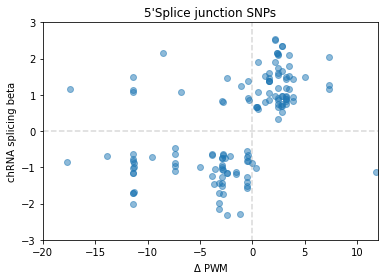

In [16]:
plt.plot([0, 0], [-5, 5], linestyle='--', alpha=0.3, c='gray')
plt.plot([-20, 20], [0, 0], linestyle='--', alpha=0.3, c='gray')
plt.scatter(mut_diff, beta, alpha = 0.5)
plt.xlabel(r'$\Delta$ PWM')
plt.ylabel('chRNA splicing beta')
plt.title("5'Splice junction SNPs")
plt.xlim([-20, 12])
plt.ylim([-3, 3])

In [28]:
df_5ss = pd.DataFrame(df_out).drop_duplicates()
df_5ss.columns = ['SNP', 'Intron', 'DeltaPWM', "Beta"]
df_5ss.to_csv('chRNA.5SS.tab', sep='\t', index=False, header=True)

In [10]:
merged_splicing.loc[merged_splicing.snp_x == '19:41586462:A:T']

,snp_x,beta,beta_se,p,Locus,phenotype_full,iteration,ColocPr,RegionalPr,TopSNPFinemapPr,snp_y,ColocalizedCluster,FinemapPr
2763,19:41586462:A:T,-0.817893,0.119582,1.145110e-09,ENSG00000007129.18,chRNA.Splicing;19:41586195:41586464:clu_45477_+,1,0.5223,0.5853,1.0,19:41586462:A:T,1,1.000000
2764,19:41586462:A:T,-0.817893,0.119582,1.145110e-09,ENSG00000007129.18,chRNA.Splicing;19:41586195:41586464:clu_45477_+,1,0.5223,0.5853,1.0,19:41585872:G:A,2,1.000000
2765,19:41586462:A:T,-0.817893,0.119582,1.145110e-09,ENSG00000007129.18,chRNA.Splicing;19:41586195:41586464:clu_45477_+,1,0.5223,0.5853,1.0,19:41565563:C:CACAG,3,0.999082
2766,19:41586462:A:T,-1.014110,0.126437,5.143880e-12,ENSG00000007129.18,chRNA.Splicing;19:41585871:41586464:clu_45477_+,1,0.5223,0.5853,1.0,19:41586462:A:T,1,1.000000
2767,19:41586462:A:T,-1.014110,0.126437,5.143880e-12,ENSG00000007129.18,chRNA.Splicing;19:41585871:41586464:clu_45477_+,1,0.5223,0.5853,1.0,19:41585872:G:A,2,1.000000
2768,19:41586462:A:T,-1.014110,0.126437,5.143880e-12,ENSG00000007129.18,chRNA.Splicing;19:41585871:41586464:clu_45477_+,1,0.5223,0.5853,1.0,19:41565563:C:CACAG,3,0.999082
2769,19:41586462:A:T,1.134300,0.136305,1.271760e-12,ENSG00000007129.18,chRNA.Splicing;19:41585871:41586154:clu_45477_+,1,0.5223,0.5853,1.0,19:41586462:A:T,1,1.000000
2770,19:41586462:A:T,1.134300,0.136305,1.271760e-12,ENSG00000007129.18,chRNA.Splicing;19:41585871:41586154:clu_45477_+,1,0.5223,0.5853,1.0,19:41585872:G:A,2,1.000000
2771,19:41586462:A:T,1.134300,0.136305,1.271760e-12,ENSG00000007129.18,chRNA.Splicing;19:41585871:41586154:clu_45477_+,1,0.5223,0.5853,1.0,19:41565563:C:CACAG,3,0.999082
2778,19:41586462:A:T,0.646264,0.146786,3.091370e-05,ENSG00000007129.18,chRNA.Splicing;19:41585495:41585840:clu_45477_+,1,0.5223,0.5853,1.0,19:41586462:A:T,1,1.000000


(-3.0, 3.0)

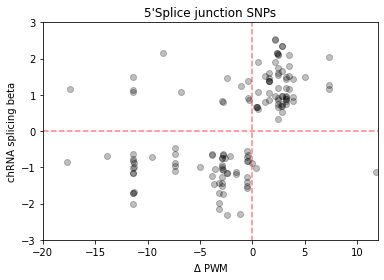

In [13]:
plt.plot([0, 0], [-5, 5], linestyle='--', alpha=0.5, c='red')
plt.plot([-20, 20], [0, 0], linestyle='--', alpha=0.5, c='red')
plt.scatter(mut_diff, beta, alpha = 0.25, c='black')
plt.xlabel(r'$\Delta$ PWM')
plt.ylabel('chRNA splicing beta')
plt.title("5'Splice junction SNPs")
plt.xlim([-20, 12])
plt.ylim([-3, 3])

In [35]:
ch_mut_diff = mut_diff
ch_beta = beta
ch_snp = sig_snp

In [83]:
spearmanr(beta, mut_diff)

SpearmanrResult(correlation=0.6091564922496572, pvalue=1.3959083458530225e-15)

In [82]:
pearsonr(beta, mut_diff)

(0.531826615450316, 1.3659286793794182e-11)

In [36]:
df = pd.read_csv('../../polyA.Splicing.hyprcoloc_5ss.sorted.tab', sep='\t', names=['name', 'seq'])

df['seq'] = df['seq'].apply(Seq)

m  = motifs.create(df['seq'])
pwm = m.counts.normalize()
pssm = pwm.log_odds()

df['score'] = df['seq'].apply(pssm.calculate)


df_extended = pd.read_csv('../../polyA.Splicing.hyprcoloc_5ss.extended.sorted.tab', sep='\t', names=['name', 'seq'])
df_extended['seq'] = df_extended['seq'].apply(Seq)

me  = motifs.create(df_extended['seq'])
pwme = me.counts.normalize()
pssme = pwme.log_odds()

# pssm.calculate(m.consensus)
df_extended['score'] = df_extended['seq'].apply(pssme.calculate)

df.index = [df.name[i].split('::')[0] for i in range(len(df.name))]
df_extended.index = [df_extended.name[i].split('::')[0] for i in range(len(df_extended.name))]

merged_snps = colocalized.merge(snps, left_on='Locus', right_on='Locus')

splicing_idx = merged_snps.loc[
    [y == 'polyA.Splicing.Subset_YRI' for y in [x.split(';')[0] for x in merged_snps.phenotype_full]]
].index

In [37]:
def mutate(seq, extended_seq, pos, snp, strand):
    
    chrom, position, original, new = snp.split(':')
    
    if strand == '-':
        seq = get_neg_nucleotide(seq)
        extended_seq = get_neg_nucleotide(extended_seq)
    
    if (len(original) == 1) and (len(new)==1):
        
        assert seq[pos] == original

        nuc = list(seq)
        nuc[pos] = new

        mutated_seq = ''.join(nuc)

        if strand == '-':
            mutated_seq = get_neg_nucleotide(mutated_seq)

        return mutated_seq
    
    else:
        
        if strand == '+':

            assert extended_seq[(pos+20):(pos+len(original)+20)] == original
            
            seq5 = extended_seq[:(pos+20)]
            seq3 = extended_seq[(pos+len(original)+20):]

            mutated_seq = seq5 + new + seq3
            mutated_seq = mutated_seq[20:28]
            
        else:
            
            assert extended_seq[(pos+21-len(original)):(pos+21)][::-1] == original
            
            seq5 = extended_seq[:(pos+21)][::-1]
            seq3 = extended_seq[(pos+21-len(original)):][::-1]
            
            mutated_seq = seq5 + new + seq3
            mutated_seq = get_neg_nucleotide(mutated_seq)[::-1][20:28]
        
        return mutated_seq
        
        
    
def get_neg_nucleotide(S):
    new_S = ''
    for i in range(len(S)):
        N = S[i]
        if N == 'A':
            new_S += 'T'
        elif N == 'T':
            new_S += 'A'
        elif N == 'G':
            new_S += 'C'
        elif N == 'C':
            new_S += 'G'
    return new_S#[::-1]
        

def get_splice_junctions(intron):
    chrom, start, end, clu = intron.split(';')[1].split(':')
    strand = clu.split('_')[-1]
    
    return int(start), int(end), strand


def isSNPin5SS(snp, intron, mut_diff):
    
    snp_pos = int(snp.split(':')[1])
    
    start, end, strand = get_splice_junctions(intron)
    
    seq = str(df.loc[intron].seq)
    extended_seq = str(df_extended.loc[intron].seq)
    
    for i in range(8):
        if strand == '+':
            test_pos = start + i - 1
        else:
            test_pos = end - i + 1
        
        if snp_pos == test_pos:
            mutated_seq = mutate(seq, extended_seq, i, snp, strand)
            mut_diff.append(np.max([pssm.calculate(Seq(mutated_seq)), -10]) - pssm.calculate(Seq(seq)))
            
            return mut_diff
    return mut_diff


def isClusterinSJ(data, snp_x, mut_diff, beta):
    snp_x_data = data.loc[data.snp_x == snp_x]
    
    token = False
    
    snps_sj_pr = []
    snps_no_sj_pr = []
    betas = []
    p = []
    
    for idx in snp_x_data.index:
        
        l = len(mut_diff)
        
        intron = snp_x_data.loc[idx, 'phenotype_full']
        snp_y = snp_x_data.loc[idx, 'snp_y']
        locus = snp_x_data.loc[idx, 'Locus']
        
        mut_diff = isSNPin5SS(snp_y, intron, mut_diff)
        
        if l < len(mut_diff):
            beta.append(snp_x_data.loc[idx, 'beta'])
            
    return mut_diff, beta
        
        

merged_splicing = merged_snps.loc[splicing_idx]

mut_diff = []
beta = []

sig_snp = []

for snp_x in tqdm(merged_splicing.snp_x.unique(), leave=True, position=0):
    l = len(mut_diff)
    mut_diff, beta = isClusterinSJ(merged_splicing, snp_x, mut_diff, beta)
    if len(mut_diff) > l:
        sig_snp.append(snp_x)

100%|██████████| 1018/1018 [00:16<00:00, 59.99it/s]


In [94]:
len(beta)

117

(-3.0, 3.0)

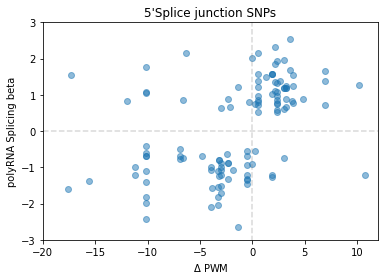

In [38]:
plt.plot([0, 0], [-5, 5], linestyle='--', alpha=0.3, c='gray')
plt.plot([-20, 20], [0, 0], linestyle='--', alpha=0.3, c='gray')
plt.scatter(mut_diff, beta, alpha = 0.5)
plt.xlabel(r'$\Delta$ PWM')
plt.ylabel('polyRNA Splicing beta')
plt.title("5'Splice junction SNPs")
plt.xlim([-20, 12])
plt.ylim([-3, 3])

(-3.0, 3.0)

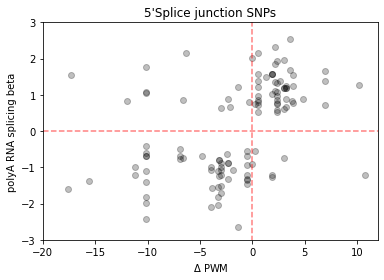

In [44]:
plt.plot([0, 0], [-5, 5], linestyle='--', alpha=0.5, c='red')
plt.plot([-20, 20], [0, 0], linestyle='--', alpha=0.5, c='red')
plt.scatter(mut_diff, beta, alpha = 0.25, c='black')
plt.xlabel(r'$\Delta$ PWM')
plt.ylabel('polyA RNA splicing beta')
plt.title("5'Splice junction SNPs")
plt.xlim([-20, 12])
plt.ylim([-3, 3])

In [96]:
from scipy.stats import pearsonr, spearmanr

In [18]:
pearsonr(mut_diff, beta)

(0.4433842368622213, 5.542722642269713e-07)

In [98]:
spearmanr(mut_diff, beta)

SpearmanrResult(correlation=0.5399405524463241, pvalue=3.3341072928725283e-10)

In [19]:
pearsonr(ch_mut_diff, ch_beta)

(0.531826615450316, 1.3659286793794182e-11)

In [45]:
spearmanr(ch_mut_diff, ch_beta)

SpearmanrResult(correlation=0.6091564922496572, pvalue=1.3959083458530225e-15)

In [42]:
ch = []
po = []

for i in range(len(sig_snp)):
    if sig_snp[i] in ch_snp:
        po.append(beta[i])
        
        j = ch_snp.index(sig_snp[i])
        ch.append(ch_beta[j])

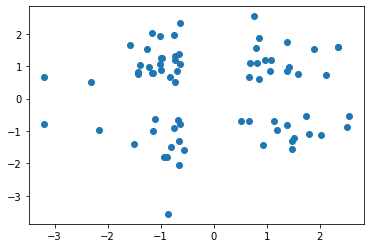

In [43]:
plt.scatter(ch, po)

In [24]:
ch_snp.index(sig_snp[1])

ValueError: '17:48069291:T:A' is not in list

In [21]:
sig_snp

['7:1998126:G:A',
 '17:48069291:T:A',
 '7:8176225:T:C',
 '2:201141373:G:A',
 '12:21501473:G:A',
 '2:75717401:C:T',
 '17:50547162:A:C',
 '17:12945405:T:C',
 '19:41565563:C:CACAG',
 '19:41586462:A:T',
 '19:41585872:G:A',
 '1:112546384:C:T',
 '16:601115:G:T',
 '1:1718040:T:TAG',
 '1:1689465:A:G',
 '12:16350855:T:G',
 '1:209758952:T:A',
 '1:209806682:C:T',
 '12:4605916:G:A',
 '7:38225578:CTTGAAAAGA:C',
 '3:52532898:C:A',
 '6:111842871:G:A',
 '17:51166498:G:A',
 '3:45474257:G:A',
 '3:45399578:CT:C',
 '16:21186745:T:C',
 '19:35338353:G:A',
 '6:53250392:T:C',
 '4:6609511:TG:T',
 '17:44316094:A:C',
 '16:29815217:T:C',
 '7:151336542:T:C',
 '12:31081986:A:G',
 '4:1744043:A:G',
 '10:99685834:A:C',
 '2:32678481:G:A',
 '1:24924042:CA:C',
 '10:112445631:G:A',
 '11:505006:G:C',
 '11:502217:C:T',
 '22:50526017:A:T',
 '6:26426755:CT:C',
 '12:95237500:T:C',
 '12:27416246:C:T',
 '12:27379288:C:T',
 '6:155242154:C:T',
 '17:44346476:T:G',
 '3:119309457:C:T',
 '6:49379837:G:A',
 '1:109283514:C:T',
 '13:2068

In [57]:
df = pd.read_csv('../../hyprcoloc_output_old/hyprcoloc_3ss.sorted.tab', sep='\t', names=['name', 'seq'])

df['seq'] = df['seq'].apply(Seq)

m  = motifs.create(df['seq'])
pwm = m.counts.normalize()
pssm = pwm.log_odds()

df['score'] = df['seq'].apply(pssm.calculate)


df_extended = pd.read_csv('../../hyprcoloc_output_old/hyprcoloc_3ss.extended.sorted.tab', sep='\t', names=['name', 'seq'])
df_extended['seq'] = df_extended['seq'].apply(Seq)

me  = motifs.create(df_extended['seq'])
pwme = me.counts.normalize()
pssme = pwme.log_odds()

# pssm.calculate(m.consensus)
df_extended['score'] = df_extended['seq'].apply(pssme.calculate)

df.index = [df.name[i].split('::')[0] for i in range(len(df.name))]
df_extended.index = [df_extended.name[i].split('::')[0] for i in range(len(df_extended.name))]

In [29]:
df = pd.read_csv('../../chRNA.Splicing.hyprcoloc_3ss.sorted.tab', sep='\t', names=['name', 'seq'])

df['seq'] = df['seq'].apply(Seq)

m  = motifs.create(df['seq'])
pwm = m.counts.normalize()
pssm = pwm.log_odds()

df['score'] = df['seq'].apply(pssm.calculate)


df_extended = pd.read_csv('../../chRNA.Splicing.hyprcoloc_3ss.extended.sorted.tab', sep='\t', names=['name', 'seq'])
df_extended['seq'] = df_extended['seq'].apply(Seq)

me  = motifs.create(df_extended['seq'])
pwme = me.counts.normalize()
pssme = pwme.log_odds()

# pssm.calculate(m.consensus)
df_extended['score'] = df_extended['seq'].apply(pssme.calculate)

df.index = [df.name[i].split('::')[0] for i in range(len(df.name))]
df_extended.index = [df_extended.name[i].split('::')[0] for i in range(len(df_extended.name))]

merged_snps = colocalized.merge(snps, left_on='Locus', right_on='Locus')

splicing_idx = merged_snps.loc[
    [y == 'chRNA.Splicing' for y in [x.split(';')[0] for x in merged_snps.phenotype_full]]
].index

In [32]:
def mutate(seq, extended_seq, pos, snp, strand):
    
    
    chrom, position, original, new = snp.split(':')
    
    if strand == '-':
        seq = get_neg_nucleotide(seq)
        extended_seq = get_neg_nucleotide(extended_seq)
    
    if (len(original) == 1) and (len(new)==1):
        
        assert seq[pos] == original

        nuc = list(seq)
        nuc[pos] = new

        mutated_seq = ''.join(nuc)

        if strand == '-':
            mutated_seq = get_neg_nucleotide(mutated_seq)

        return mutated_seq
    
    else:
        
        if strand == '+':

            assert extended_seq[(pos+20):(pos+len(original)+20)] == original
            
            seq5 = extended_seq[:(pos+20)]
            seq3 = extended_seq[(pos+len(original)+20):]

            mutated_seq = seq5 + new + seq3
            mutated_seq = mutated_seq[20:28]
            
        else:
            
            assert extended_seq[(pos+21-len(original)):(pos+21)][::-1] == original
            
            seq5 = extended_seq[:(pos+21)][::-1]
            seq3 = extended_seq[(pos+21-len(original)):][::-1]
            
            mutated_seq = seq5 + new + seq3
            mutated_seq = get_neg_nucleotide(mutated_seq)[::-1][20:28]
        
        return mutated_seq
        
        
    
def get_neg_nucleotide(S):
    new_S = ''
    for i in range(len(S)):
        N = S[i]
        if N == 'A':
            new_S += 'T'
        elif N == 'T':
            new_S += 'A'
        elif N == 'G':
            new_S += 'C'
        elif N == 'C':
            new_S += 'G'
    return new_S#[::-1]
        

def get_splice_junctions(intron):
    chrom, start, end, clu = intron.split(';')[1].split(':')
    strand = clu.split('_')[-1]
    
    return int(start), int(end), strand


def isSNPin3SS(snp, intron, mut_diff):
    
    snp_pos = int(snp.split(':')[1])
    
    start, end, strand = get_splice_junctions(intron)
    
    seq = str(df.loc[intron].seq)
    extended_seq = str(df_extended.loc[intron].seq)
    
    for i in range(8):
        if strand == '+':
            test_pos = end + i - 6
        else:
            test_pos = start - i + 6
        
        if snp_pos == test_pos:
            mutated_seq = mutate(seq, extended_seq, i, snp, strand)
            
            mut_diff.append(np.max([pssm.calculate(Seq(mutated_seq)), -10]) - pssm.calculate(Seq(seq)))
            
            return mut_diff
    return mut_diff


def isClusterinSJ(data, snp_x, mut_diff, beta):
    snp_x_data = data.loc[data.snp_x == snp_x]
    
    token = False
    
    snps_sj_pr = []
    snps_no_sj_pr = []
    betas = []
    p = []
    
    df_list = []
    
    for idx in snp_x_data.index:
        
        l = len(mut_diff)
        
        intron = snp_x_data.loc[idx, 'phenotype_full']
        snp_y = snp_x_data.loc[idx, 'snp_y']
        locus = snp_x_data.loc[idx, 'Locus']
        
        mut_diff = isSNPin3SS(snp_y, intron, mut_diff)
        
        if l < len(mut_diff):
            beta.append(snp_x_data.loc[idx, 'beta'])
            
            
            df_list.append([snp_y, intron, mut_diff[-1], snp_x_data.loc[idx, 'beta']])
            
            print(snp_y)
            print(intron)
            print(mut_diff[-1])
            print(snp_x_data.loc[idx, 'beta'])
            print('')
            
    return mut_diff, beta, df_list
        
        

merged_splicing = merged_snps.loc[splicing_idx]

mut_diff = []
beta = []
df_out_3ss = []

for snp_x in tqdm(merged_splicing.snp_x.unique(), leave=True, position=0):
    
    mut_diff, beta, df_list = isClusterinSJ(merged_splicing, snp_x, mut_diff, beta)
    df_out_3ss.extend(df_list)

  1%|          | 14/1150 [00:00<00:18, 62.10it/s]

2:201141373:G:A
chRNA.Splicing;2:201140439:201141374:clu_8162_+
-10.352043151855469
-1.37174

19:41586462:A:T
chRNA.Splicing;19:41586195:41586464:clu_45477_+
-18.568903923034668
-0.817893

19:41586462:A:T
chRNA.Splicing;19:41585871:41586464:clu_45477_+
-18.568903923034668
-1.01411

19:41586462:A:T
chRNA.Splicing;19:41585495:41586464:clu_45477_+
-18.568903923034668
1.45665



  4%|▍         | 48/1150 [00:00<00:20, 53.38it/s]

12:27390095:G:A
chRNA.Splicing;12:27389296:27390096:clu_31236_+
-10.13370829820633
-2.47981



 11%|█         | 127/1150 [00:02<00:13, 73.09it/s]

3:185285514:TAG:T
chRNA.Splicing;3:185283027:185285517:clu_11453_+
-15.978557586669922
-2.82654

14:103457138:A:G
chRNA.Splicing;14:103451983:103457142:clu_34038_+
-0.21268749237060547
-1.21873



 14%|█▍        | 161/1150 [00:02<00:14, 68.83it/s]

20:18412855:C:T
chRNA.Splicing;20:18412853:18412968:clu_46136_-
9.35038697719574
0.867703

20:18412855:C:T
chRNA.Splicing;20:18412853:18414348:clu_46136_-
9.35038697719574
1.22033

12:112919388:G:A
chRNA.Splicing;12:112917700:112919389:clu_32064_+
-10.352043867111206
-1.21429

7:140700870:C:G
chRNA.Splicing;7:140696842:140700870:clu_20781_+
1.7970702648162842
0.58175



 15%|█▌        | 177/1150 [00:02<00:14, 67.01it/s]

19:18086934:T:A
chRNA.Splicing;19:18086932:18090650:clu_43722_-
-16.097581386566162
-0.943364

19:18086934:T:A
chRNA.Splicing;19:18086932:18098755:clu_43722_-
-16.097581386566162
-1.15904

22:50505337:G:A
chRNA.Splicing;22:50505334:50505403:clu_49213_-
-1.0618650913238525
-1.00608



 17%|█▋        | 191/1150 [00:03<00:20, 47.14it/s]

14:57481662:T:C
chRNA.Splicing;14:57481660:57483065:clu_34506_-
-9.350386619567871
-1.38605

14:57481662:T:C
chRNA.Splicing;14:57481657:57483065:clu_34506_-
-0.3658714294433594
1.22833

14:58456677:G:A
chRNA.Splicing;14:58453473:58456678:clu_33616_+
-10.352043628692627
-1.99587



 20%|██        | 232/1150 [00:03<00:14, 64.60it/s]

15:78939176:A:G
chRNA.Splicing;15:78939171:78944778:clu_35747_-
-1.1090106964111328
-0.78751



 25%|██▍       | 286/1150 [00:04<00:12, 69.64it/s]

11:68043795:C:A
chRNA.Splicing;11:68043653:68043798:clu_28881_+
-3.269460618495941
-1.52131

12:3863956:C:T
chRNA.Splicing;12:3863957:3873212:clu_29513_-
0.6300995349884033
-0.886607

12:6872998:C:T
chRNA.Splicing;12:6872997:6873246:clu_29573_-
-10.352043151855469
-1.09833



 27%|██▋       | 309/1150 [00:04<00:13, 62.37it/s]

3:132718123:A:G
chRNA.Splicing;3:132718117:132718994:clu_9704_-
-0.900604248046875
-0.774248

2:74455385:C:T
chRNA.Splicing;2:74455174:74455391:clu_7329_+
0.900604248046875
1.41696



 30%|███       | 346/1150 [00:06<00:32, 25.08it/s]

4:153592475:A:G
chRNA.Splicing;4:153591194:153592475:clu_12376_+
0.7930903434753418
-0.784165



 39%|███▉      | 449/1150 [00:08<00:11, 62.34it/s]

11:9724654:G:A
chRNA.Splicing;11:9694286:9724658:clu_28231_+
0.21268749237060547
-0.624408



 41%|████      | 467/1150 [00:08<00:12, 53.70it/s]

6:109443332:G:T
chRNA.Splicing;6:109443081:109443332:clu_16759_+
-2.2201004028320312
-0.687345



 43%|████▎     | 497/1150 [00:09<00:12, 50.30it/s]

1:93667232:G:A
chRNA.Splicing;1:93667229:93674614:clu_1172_-
-1.0618650913238525
0.705749

4:107670866:A:G
chRNA.Splicing;4:107670863:107682015:clu_13148_-
1.0618648529052734
0.891729



 44%|████▍     | 509/1150 [00:09<00:14, 44.30it/s]

12:53164759:G:C
chRNA.Splicing;12:53164755:53166205:clu_30008_-
-0.2742753028869629
-0.878178

12:53164759:G:C
chRNA.Splicing;12:53164755:53170072:clu_30008_-
-0.2742753028869629
-1.37333



 47%|████▋     | 539/1150 [00:10<00:09, 66.14it/s]

19:51417359:C:T
chRNA.Splicing;19:51417358:51417545:clu_44305_-
-10.352043151855469
-0.878436

1:179889309:G:A
chRNA.Splicing;1:179884769:179889310:clu_4427_+
-10.352043390274048
-1.48477

1:179889309:G:A
chRNA.Splicing;1:179884769:179889313:clu_4427_+
0.21268725395202637
1.51448



 52%|█████▏    | 595/1150 [00:10<00:06, 87.42it/s]

11:113368360:G:A
chRNA.Splicing;11:113368258:113368361:clu_29212_+
-10.352043628692627
-1.10542

20:18161818:A:G
chRNA.Splicing;20:18159265:18161823:clu_46739_+
-0.3658714294433594
1.45529

20:18161818:A:G
chRNA.Splicing;20:18159265:18161820:clu_46739_+
-9.350386619567871
-1.90532



 54%|█████▎    | 618/1150 [00:11<00:10, 52.38it/s]

5:83353124:G:A
chRNA.Splicing;5:83258677:83353125:clu_13962_+
-10.352043390274048
-1.20591

17:69179009:T:C
chRNA.Splicing;17:69179008:69182153:clu_40562_-
10.352043628692627
1.1201



 55%|█████▌    | 636/1150 [00:11<00:07, 64.47it/s]

18:11905954:C:T
chRNA.Splicing;18:11905953:11906203:clu_42838_-
-10.352043628692627
-0.951451

8:123441303:T:A
chRNA.Splicing;8:123438238:123441306:clu_22519_+
-2.2075953483581543
0.762653

8:123441303:T:A
chRNA.Splicing;8:123437334:123441306:clu_22519_+
-2.2075953483581543
-1.17139



 58%|█████▊    | 664/1150 [00:12<00:13, 36.30it/s]

5:131391830:G:A
chRNA.Splicing;5:131391108:131391829:clu_14237_+
0.6300997734069824
0.877254



 60%|██████    | 690/1150 [00:12<00:08, 55.21it/s]

9:127905303:C:T
chRNA.Splicing;9:127905302:127905935:clu_23488_-
-10.352043151855469
-1.175

9:127905303:C:T
chRNA.Splicing;9:127905302:127905935:clu_23488_-
-10.352043151855469
-1.175

1:92476723:G:GA
chRNA.Splicing;1:92476720:92478588:clu_1155_-
-18.467432975769043
0.909395



 63%|██████▎   | 720/1150 [00:13<00:08, 51.76it/s]

3:121923201:A:T
chRNA.Splicing;3:121923129:121923206:clu_11006_+
2.569490909576416
0.884419



 64%|██████▎   | 732/1150 [00:13<00:11, 37.50it/s]

5:79660796:G:C
chRNA.Splicing;5:79657001:79660801:clu_13923_+
1.8263516426086426
0.809815

8:99892049:T:C
chRNA.Splicing;8:99892047:99893639:clu_21426_-
-9.350386440753937
-0.834983



 65%|██████▌   | 749/1150 [00:14<00:07, 54.42it/s]

8:125083261:G:A
chRNA.Splicing;8:125083258:125091615:clu_21555_-
-1.0618653297424316
-0.96544

13:20483441:C:A
chRNA.Splicing;13:20483435:20489370:clu_32356_-
2.452622890472412
1.12773

17:54999625:G:A
chRNA.Splicing;17:54999451:54999626:clu_41851_+
-10.352043628692627
-1.62113



 68%|██████▊   | 786/1150 [00:14<00:05, 64.80it/s]

16:28835545:G:A
chRNA.Splicing;16:28835399:28835546:clu_38512_+
-10.352043628692627
-1.54732

16:28835545:G:A
chRNA.Splicing;16:28835399:28835549:clu_38512_+
0.21268725395202637
1.41754



 72%|███████▏  | 830/1150 [00:15<00:04, 69.77it/s]

11:71444125:C:T
chRNA.Splicing;11:71444119:71444855:clu_27560_-
0.022809505462646484
0.831299



 76%|███████▌  | 870/1150 [00:17<00:17, 15.89it/s]

14:95436970:TAGA:T
chRNA.Splicing;14:95436966:95439033:clu_34846_-
-17.66830015182495
-2.00047

16:89100658:C:G
chRNA.Splicing;16:89098763:89100662:clu_39178_+
-0.2742753028869629
-1.00269

16:89100658:C:G
chRNA.Splicing;16:89093992:89100662:clu_39178_+
-0.2742753028869629
-0.509406

16:89100658:C:G
chRNA.Splicing;16:89093996:89100662:clu_39178_+
-0.2742753028869629
-1.04443



 79%|███████▉  | 906/1150 [00:18<00:07, 32.71it/s]

3:56565131:T:C
chRNA.Splicing;3:56564125:56565134:clu_10753_+
1.0618653297424316
1.70611

4:168396128:C:T
chRNA.Splicing;4:168396124:168400826:clu_13384_-
0.21268749237060547
1.31433

4:168396128:C:T
chRNA.Splicing;4:168396127:168400826:clu_13384_-
-10.287634432315826
-1.37672



 82%|████████▏ | 938/1150 [00:18<00:03, 67.13it/s]

7:20147939:C:A
chRNA.Splicing;7:20147934:20154193:clu_18605_-
2.9353623390197754
1.11629



 83%|████████▎ | 955/1150 [00:19<00:03, 63.11it/s]

2:99197151:T:C
chRNA.Splicing;2:99195756:99197154:clu_7530_+
1.0618653297424316
0.69223

2:99197151:T:C
chRNA.Splicing;2:99195756:99197154:clu_7530_+
1.0618653297424316
0.69223



 85%|████████▍ | 972/1150 [00:19<00:02, 60.80it/s]

11:58610951:A:G
chRNA.Splicing;11:58610334:58610950:clu_28517_+
-0.6300997734069824
0.987146

11:58610951:A:G
chRNA.Splicing;11:58610334:58610953:clu_28517_+
-9.35038697719574
-1.13805

11:61398259:C:CA
chRNA.Splicing;11:61397975:61398261:clu_28563_+
-1.9269371032714844
1.69789

19:36689395:A:G
chRNA.Splicing;19:36687634:36689401:clu_45344_+
-0.022809863090515137
0.991642



 86%|████████▌ | 990/1150 [00:19<00:02, 56.02it/s]

19:36689395:A:G
chRNA.Splicing;19:36687686:36689397:clu_45344_+
-9.35038685798645
-0.969831



 94%|█████████▍| 1083/1150 [00:22<00:03, 21.51it/s]

14:23564163:G:C
chRNA.Splicing;14:23564159:23564333:clu_34232_-
-0.2742753028869629
-2.6584



100%|██████████| 1150/1150 [00:24<00:00, 47.75it/s]


(-3.0, 3.0)

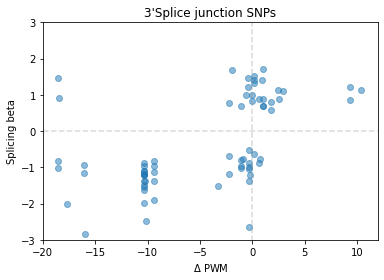

In [33]:
plt.plot([0, 0], [-5, 5], linestyle='--', alpha=0.3, c='gray')
plt.plot([-20, 20], [0, 0], linestyle='--', alpha=0.3, c='gray')
plt.scatter(mut_diff, beta, alpha = 0.5)
plt.xlabel(r'$\Delta$ PWM')
plt.ylabel('Splicing beta')
plt.title("3'Splice junction SNPs")
plt.xlim([-20, 12])
plt.ylim([-3, 3])

In [34]:
df_3ss = pd.DataFrame(df_out_3ss).drop_duplicates()
df_3ss.columns = ['SNP', 'Intron', 'DeltaPWM', "Beta"]
df_3ss.to_csv('chRNA.3SS.tab', sep='\t', index=False, header=True)

In [35]:
df_3ss

,SNP,Intron,DeltaPWM,Beta
0,2:201141373:G:A,chRNA.Splicing;2:201140439:201141374:clu_8162_+,-10.352043,-1.371740
1,19:41586462:A:T,chRNA.Splicing;19:41586195:41586464:clu_45477_+,-18.568904,-0.817893
2,19:41586462:A:T,chRNA.Splicing;19:41585871:41586464:clu_45477_+,-18.568904,-1.014110
3,19:41586462:A:T,chRNA.Splicing;19:41585495:41586464:clu_45477_+,-18.568904,1.456650
4,12:27390095:G:A,chRNA.Splicing;12:27389296:27390096:clu_31236_+,-10.133708,-2.479810
...,...,...,...,...
65,11:58610951:A:G,chRNA.Splicing;11:58610334:58610953:clu_28517_+,-9.350387,-1.138050
66,11:61398259:C:CA,chRNA.Splicing;11:61397975:61398261:clu_28563_+,-1.926937,1.697890
67,19:36689395:A:G,chRNA.Splicing;19:36687634:36689401:clu_45344_+,-0.022810,0.991642
68,19:36689395:A:G,chRNA.Splicing;19:36687686:36689397:clu_45344_+,-9.350387,-0.969831
